
Importing the Library needed for this task

In [24]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm
pd.options.display.max_columns = 500
from statsmodels.stats.outliers_influence import variance_inflation_factor

read the CSV file for Training data

In [25]:
dataset=pd.read_csv('exercise_05_train.csv')
print(dataset.head())
print("dataset.shape",dataset.shape)

         x0         x1         x2         x3         x4         x5        x6  \
0  0.963686   6.627185 -45.224008   9.477531  -3.216532  13.216874  9.754747   
1 -1.770062 -23.610459  -0.964003 -31.981497 -10.294599 -10.240251 -1.518888   
2  9.962401  -8.349849  23.248891 -24.196879   8.937480  10.965000 -7.490596   
3 -5.780709 -25.261584   1.383115 -11.786929   7.993078 -11.245752 -2.607351   
4  1.211541   1.119963   7.512938  21.987312  -5.155392  10.339416  3.045180   

         x7        x8        x9        x10        x11        x12       x13  \
0  5.245851 -1.102918 -2.867482 -37.632285 -12.983484 -30.244259  0.293407   
1 -1.675208  0.498134 -0.614390  47.652135   6.567264 -30.410216 -1.301751   
2 -3.025094  0.595807  0.382732   5.629537   3.769767  17.623199 -0.396468   
3 -3.513896 -0.614235 -1.453979  -2.636676  -3.595789 -19.648688  0.393391   
4 -0.619230 -0.928068  0.405024 -16.683612   6.534574 -39.182061 -0.424392   

         x14       x15        x16       x17       

Read the CSV file for the test data

In [26]:
#test
dataset_test=pd.read_csv('exercise_05_test.csv')
print(dataset_test.head())
print("dataset.shape",dataset_test.shape)

          x0         x1         x2         x3         x4         x5        x6  \
0   0.519093  -4.606038  13.707586 -17.990903  12.873394  14.910935  2.915341   
1 -12.357004  13.874141  14.052924  34.129247  34.511107  34.583336 -0.482540   
2   1.834922   2.665252 -44.873210  21.941920  10.102981   5.962249 -5.733909   
3  20.972483  11.548506 -40.924625 -35.296796 -35.253101 -14.601890  5.045075   
4  -9.916044   5.509811  31.749288  -0.803916  -4.005098  20.912490  0.419346   

          x7        x8        x9        x10        x11        x12       x13  \
0 -10.110081  1.628317 -0.365064  10.646442   3.922680  34.998362  2.433472   
1  -6.583407 -4.326799 -1.216928  -5.709141   6.175520   2.121554  1.578756   
2  -4.061670 -0.172269  0.096051  22.315785   3.330807  -8.121101 -1.985411   
3  10.841771 -1.872260 -0.002583  60.212310 -11.716837 -17.011739 -1.363757   
4  -2.949516  1.057176 -0.338547  25.056651   3.103853  -7.541111  1.521165   

         x14       x15       x16      

## removing the signs from columns

In [27]:
dataset['x41'] = dataset['x41'].str.replace('(', '')
dataset['x41'] = dataset['x41'].str.replace(')', '')
dataset['x41'] = dataset['x41'].str.replace('$', '')
dataset['x45'] = dataset['x45'].str.replace('%', '')

In [28]:
dataset_test['x41'] = dataset_test['x41'].str.replace('(', '')
dataset_test['x41'] = dataset_test['x41'].str.replace(')', '')
dataset_test['x41'] = dataset_test['x41'].str.replace('$', '')
dataset_test['x45'] = dataset_test['x45'].str.replace('%', '')

In [29]:
dataset_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.519093,-4.606038,13.707586,-17.990903,12.873394,14.910935,2.915341,-10.110081,1.628317,-0.365064,10.646442,3.922680,34.998362,2.433472,-3.858548,0.104192,-5.519994,3.467700,31.000121,-4.590834,0.086110,6.255197,4.697129,2.180207,7.108676,-0.908606,-0.515504,45.331378,1.637379,-9.039186,-0.790305,2.265819,-4.036708,6.636670,bmw,thurday,0.220489,-1.358649,2.930821,-6.678993,43.244917,107.93,-3.146405,-1.022139,-18.489007,0.0,-0.614079,-26.472416,-12.610643,-23.713968,11.879546,7.963185,2.183789,0.821193,4.918949,3.594825,30.639892,0.132310,45.348605,1.072083,-4.914587,-14.550192,-5.232047,-26.134083,14.509004,0.416692,-22.838256,-2.857738,Jun,-10.884239,3.085385,63.367373,4.372968,-14.474131,-46.024063,2.540470,10.338857,12.721655,1.992730,-19.241954,-47.967821,8.581891,0.996542,10.724987,7.760128,5.567248,2.267702,0.024121,-0.532450,-5.916457,-138.889799,-0.246395,-1.912581,asia,-0.633811,1.181750,-0.836542,-2.144871,0.010353,-4.819828
1,-12.357004,13.874141,14.052924,34.129247,34.511107,34.583336,-0.482540,-6.583407,-4.326799,-1.216928,-5.709141,6.175520,2.121554,1.578756,2.038905,-5.592737,-2.158564,0.521756,37.805522,1.901376,37.967075,4.546150,8.383848,9.278303,-7.514222,-1.407846,-0.761477,-18.080597,0.510580,4.201491,-0.544123,1.078374,2.652454,1.915220,tesla,thurday,0.874948,2.237308,-2.800175,-2.606274,-2.164761,-600.43,52.113208,17.110573,-23.342708,0.02,-6.399984,-7.405831,-10.343896,24.023963,-5.254145,25.897953,-0.658877,2.511540,0.195778,-5.103109,-10.249778,-0.807787,21.351741,2.842510,-0.187795,1.657564,-12.863514,-14.917924,4.622873,-3.404009,-6.014435,6.476535,May,23.032601,0.134983,-39.146113,4.458458,-23.588318,-24.292462,-1.657806,-2.733824,15.606533,0.216613,25.813679,59.937780,0.012385,0.107180,-20.315577,-8.655952,-4.170537,8.350734,13.554121,3.673744,-1.785349,117.305737,0.316266,6.838756,asia,-4.357530,0.390822,14.052604,-2.744911,-0.005648,-1.253519
2,1.834922,2.665252,-44.873210,21.941920,10.102981,5.962249,-5.733909,-4.061670,-0.172269,0.096051,22.315785,3.330807,-8.121101,-1.985411,6.428962,-2.646925,8.367280,-5.545219,5.879821,10.221974,-9.095619,-1.368356,-39.691225,5.286057,0.562340,0.016971,1.894738,10.513043,1.026482,-7.617738,9.442215,2.980519,3.070543,-1.370332,Honda,thurday,-1.454560,-3.010714,1.356234,9.807104,2.126665,103.08,-26.994659,-35.031274,-48.063859,-0.0,2.881744,-3.667737,-2.689463,-24.241777,33.275643,-30.165712,-1.143288,0.469528,-0.721423,3.937095,-1.670088,0.250321,-22.040152,-4.361618,13.568331,12.005017,0.017017,-4.266916,-3.012223,-5.088874,9.907362,-12.322727,Jun,-28.776837,-1.321741,11.003258,-7.499675,22.115380,-37.524947,0.888089,0.662938,1.793714,-3.878713,-2.324871,-38.409542,1.975282,0.540509,31.884014,-3.407244,2.122876,-10.592297,-6.830781,0.551768,-2.317764,-66.548569,-0.657101,3.128596,asia,1.880922,0.810115,15.737267,-9.031679,0.089295,-4.285350
3,20.972483,11.548506,-40.924625,-35.296796,-35.253101,-14.601890,5.045075,10.841771,-1.872260,-0.002583,60.212310,-11.716837,-17.011739,-1.363757,2.843387,-0.390018,-0.504431,-0.001356,-45.845038,-2.662568,-0.540813,11.362248,-19.387491,-2.160935,3.217326,-0.456019,0.762841,-33.240271,-1.254007,-4.757926,-2.848993,3.598553,-1.466811,-6.091896,volkswagon,thurday,-0.387709,1.472792,2.963676,-11.401523,-10.641658,1518.78,-68.793716,3.748340,30.820518,-0.01,-2.744012,-13.942982,-13.636830,12.031190,-1.651573,59.269683,0.395016,-0.367435,4.310019,7.280113,-26.165027,-0.171132,-71.731797,-7.243651,5.103674,-2.190475,-5.299044,-1.243398,15.140766,3.999990,36.387867,-5.651444,sept.,-17.961932,2.802529,9.772352,4.565211,49.274375,-22.745785,

In [30]:
dataset.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.963686,6.627185,-45.224008,9.477531,-3.216532,13.216874,9.754747,5.245851,-1.102918,-2.867482,-37.632285,-12.983484,-30.244259,0.293407,-4.808540,9.293345,1.646353,5.687031,-14.049164,-1.158595,-20.776226,-0.789881,-39.396519,1.235763,-5.403411,-0.012328,0.703963,-22.946374,0.114717,-1.108137,-7.513845,1.278470,-3.606321,1.615670,chrystler,thur,-1.774488,8.804852,2.136329,2.501032,-6.011242,-865.28,-32.366234,-27.950057,-5.662614,0.02,-4.820389,26.350661,-17.522879,14.420626,-68.076453,-47.173300,0.954900,-3.708620,4.131492,8.424414,42.155760,-0.772753,-40.332336,4.748333,-9.002899,7.083087,-12.264477,8.626495,0.065363,-0.124457,21.750625,-5.282121,sept.,6.153703,-6.272020,17.255821,5.782086,15.141420,33.884019,-2.389519,-1.766949,-17.897092,3.736479,40.082477,16.640042,1.680384,0.373888,-13.562891,13.158882,2.289092,-3.881315,-15.959124,2.940515,-2.555928,-37.601994,0.988829,0.313772,asia,1.380664,-16.388994,5.326730,4.187294,0.045549,-3.646841,0
1,-1.770062,-23.610459,-0.964003,-31.981497,-10.294599,-10.240251,-1.518888,-1.675208,0.498134,-0.614390,47.652135,6.567264,-30.410216,-1.301751,-6.042590,1.817864,4.379207,5.676816,-37.757544,2.164646,59.052864,-1.480575,-35.736992,-8.580044,4.206910,0.732038,-1.109053,15.986872,-0.534066,5.795439,-2.556791,2.990327,-1.603091,0.633938,volkswagon,thur,0.040507,6.645667,3.205207,3.567783,5.405315,325.27,-58.117719,-49.488582,-50.291610,-0.01,1.003284,10.761073,-16.411092,2.474421,-24.002610,7.760549,-0.167079,-5.148356,8.422932,2.882336,47.178502,-0.166740,-36.199657,-0.231633,-2.334688,-4.212509,1.039474,-7.251746,0.661180,-7.073426,-36.774709,-11.458640,July,10.030685,0.918319,-38.648511,-24.077239,16.991279,19.847963,1.106517,6.949901,15.688587,4.610910,-15.223066,4.880278,6.029540,-0.506606,-16.914889,-8.219612,1.639064,7.030400,-11.601869,-4.907436,-6.075066,-27.168761,-2.162863,1.809807,asia,2.500590,4.338834,-1.583225,-1.172417,0.011216,0.097180,0
2,9.962401,-8.349849,23.248891,-24.196879,8.937480,10.965000,-7.490596,-3.025094,0.595807,0.382732,5.629537,3.769767,17.623199,-0.396468,-10.022546,1.158419,12.353464,0.398796,-0.201112,-5.803935,7.104037,2.393360,-30.622601,-12.318385,-6.341881,-0.055468,-1.176393,-13.288725,-0.383693,0.122918,-4.791641,-10.250248,5.837668,-3.756878,bmw,thurday,0.448073,-2.639292,-1.940933,-11.196415,-7.971329,743.91,-47.325525,17.089850,-20.998601,0.0,1.270592,20.947667,-1.198462,-1.228983,-16.860396,62.630162,-0.520845,-0.484470,-16.271894,-11.448579,-5.907019,0.627614,-13.539267,2.706494,17.375989,-2.434721,-1.433001,7.734776,0.489224,0.535575,2.491412,-9.652969,July,16.090371,0.180281,10.326921,-12.845434,19.811216,-44.341947,-0.513749,-1.495533,3.605778,0.480531,39.328247,-19.626495,9.321199,1.036403,19.435797,-7.605212,-3.937989,3.702377,-2.246263,1.441523,-5.642358,-90.377656,1.779660,9.528113,asia,1.396475,7.839188,10.402396,1.288991,0.008209,-4.132316,0
3,-5.780709,-25.261584,1.383115,-11.786929,7.993078,-11.245752,-2.607351,-3.513896,-0.614235,-1.453979,-2.636676,-3.595789,-19.648688,0.393391,-3.470142,0.102685,-0.882429,-1.598535,12.869959,5.374145,30.723272,4.541173,-59.270400,-0.101281,4.451334,0.650121,-1.154275,-19.434740,1.471404,9.678197,4.149206,-2.814893,-10.966831,6.516250,nissan,thurday,-0.625046,1.918934,1.046202,-6.727565,8.522306,538.48,-36.489186,3.120606,-31.523483,0.01,12.551744,0.908244,-8.868663,-37.101607,40.757401,-22.994817,0.532649,4.227293,6.650745,-0.398449,-9.192991,-0.935667,-61.343401,-14.767857,9.686716,5.354954,0.002768,9.552721,-4.347074,1.513008,14.245827,1.555428,July,10.215072,5.658302,-39.728801,-22.905705,34.801687,

## using Label encoder or One hot encoder for the categorical data

In [31]:

from sklearn.preprocessing import LabelEncoder
labelencoder34 = LabelEncoder()
dataset['x34'] = labelencoder34.fit_transform(dataset['x34'].astype(str))
labelencoder35 = LabelEncoder()
dataset['x35'] = labelencoder35.fit_transform(dataset['x35'].astype(str))
labelencoder68 = LabelEncoder()
dataset['x68'] = labelencoder68.fit_transform(dataset['x68'].astype(str))
labelencoder93 = LabelEncoder()
dataset['x93'] = labelencoder93.fit_transform(dataset['x93'].astype(str))

In [32]:
dataset_test['x34'] = labelencoder34.transform(dataset_test['x34'].astype(str))
dataset_test['x35'] = labelencoder35.transform(dataset_test['x35'].astype(str))
dataset_test['x68'] = labelencoder68.transform(dataset_test['x68'].astype(str))
dataset_test['x93'] = labelencoder93.transform(dataset_test['x93'].astype(str))

In [33]:
dataset_test.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.519093,-4.606038,13.707586,-17.990903,12.873394,14.910935,2.915341,-10.110081,1.628317,-0.365064,10.646442,3.922680,34.998362,2.433472,-3.858548,0.104192,-5.519994,3.467700,31.000121,-4.590834,0.086110,6.255197,4.697129,2.180207,7.108676,-0.908606,-0.515504,45.331378,1.637379,-9.039186,-0.790305,2.265819,-4.036708,6.636670,2,5,0.220489,-1.358649,2.930821,-6.678993,43.244917,107.93,-3.146405,-1.022139,-18.489007,0.0,-0.614079,-26.472416,-12.610643,-23.713968,11.879546,7.963185,2.183789,0.821193,4.918949,3.594825,30.639892,0.132310,45.348605,1.072083,-4.914587,-14.550192,-5.232047,-26.134083,14.509004,0.416692,-22.838256,-2.857738,6,-10.884239,3.085385,63.367373,4.372968,-14.474131,-46.024063,2.540470,10.338857,12.721655,1.992730,-19.241954,-47.967821,8.581891,0.996542,10.724987,7.760128,5.567248,2.267702,0.024121,-0.532450,-5.916457,-138.889799,-0.246395,-1.912581,1,-0.633811,1.181750,-0.836542,-2.144871,0.010353,-4.819828
1,-12.357004,13.874141,14.052924,34.129247,34.511107,34.583336,-0.482540,-6.583407,-4.326799,-1.216928,-5.709141,6.175520,2.121554,1.578756,2.038905,-5.592737,-2.158564,0.521756,37.805522,1.901376,37.967075,4.546150,8.383848,9.278303,-7.514222,-1.407846,-0.761477,-18.080597,0.510580,4.201491,-0.544123,1.078374,2.652454,1.915220,9,5,0.874948,2.237308,-2.800175,-2.606274,-2.164761,-600.43,52.113208,17.110573,-23.342708,0.02,-6.399984,-7.405831,-10.343896,24.023963,-5.254145,25.897953,-0.658877,2.511540,0.195778,-5.103109,-10.249778,-0.807787,21.351741,2.842510,-0.187795,1.657564,-12.863514,-14.917924,4.622873,-3.404009,-6.014435,6.476535,8,23.032601,0.134983,-39.146113,4.458458,-23.588318,-24.292462,-1.657806,-2.733824,15.606533,0.216613,25.813679,59.937780,0.012385,0.107180,-20.315577,-8.655952,-4.170537,8.350734,13.554121,3.673744,-1.785349,117.305737,0.316266,6.838756,1,-4.357530,0.390822,14.052604,-2.744911,-0.005648,-1.253519
2,1.834922,2.665252,-44.873210,21.941920,10.102981,5.962249,-5.733909,-4.061670,-0.172269,0.096051,22.315785,3.330807,-8.121101,-1.985411,6.428962,-2.646925,8.367280,-5.545219,5.879821,10.221974,-9.095619,-1.368356,-39.691225,5.286057,0.562340,0.016971,1.894738,10.513043,1.026482,-7.617738,9.442215,2.980519,3.070543,-1.370332,0,5,-1.454560,-3.010714,1.356234,9.807104,2.126665,103.08,-26.994659,-35.031274,-48.063859,-0.0,2.881744,-3.667737,-2.689463,-24.241777,33.275643,-30.165712,-1.143288,0.469528,-0.721423,3.937095,-1.670088,0.250321,-22.040152,-4.361618,13.568331,12.005017,0.017017,-4.266916,-3.012223,-5.088874,9.907362,-12.322727,6,-28.776837,-1.321741,11.003258,-7.499675,22.115380,-37.524947,0.888089,0.662938,1.793714,-3.878713,-2.324871,-38.409542,1.975282,0.540509,31.884014,-3.407244,2.122876,-10.592297,-6.830781,0.551768,-2.317764,-66.548569,-0.657101,3.128596,1,1.880922,0.810115,15.737267,-9.031679,0.089295,-4.285350
3,20.972483,11.548506,-40.924625,-35.296796,-35.253101,-14.601890,5.045075,10.841771,-1.872260,-0.002583,60.212310,-11.716837,-17.011739,-1.363757,2.843387,-0.390018,-0.504431,-0.001356,-45.845038,-2.662568,-0.540813,11.362248,-19.387491,-2.160935,3.217326,-0.456019,0.762841,-33.240271,-1.254007,-4.757926,-2.848993,3.598553,-1.466811,-6.091896,10,5,-0.387709,1.472792,2.963676,-11.401523,-10.641658,1518.78,-68.793716,3.748340,30.820518,-0.01,-2.744012,-13.942982,-13.636830,12.031190,-1.651573,59.269683,0.395016,-0.367435,4.310019,7.280113,-26.165027,-0.171132,-71.731797,-7.243651,5.103674,-2.190475,-5.299044,-1.243398,15.140766,3.999990,36.387867,-5.651444,12,-17.961932,2.802529,9.772352,4.565211,49.274375,-22.745785,6.892522,4.513212,-13.017882,-0.429544,26.759971,-16.694840,

# Sanity Check & Visualize Data

## Remove the duplicate data

In [34]:
dataset=dataset.drop_duplicates()
print(dataset.shape)


(40000, 101)


In [35]:
labels=dataset["y"]
data=dataset.drop( columns='y')
data=data.drop_duplicates()
print(data.shape)
print(dataset_test.shape)

(40000, 100)
(10000, 100)


### How many missing value we have

In [36]:
x=0
for i in data.columns:
    x+=data[i].isnull().sum()
print(x)

772


### Removing the missing value

In [37]:

for col in data.columns:
    data[col].fillna(value=data[col].astype(float).median(), inplace=True) 
x=0
for i in data.columns:
    x+=data[i].isnull().sum()
print(x)

0


In [38]:
x=0
for i in dataset_test.columns:
    x+=dataset_test[i].isnull().sum()
print(x)
for col in dataset_test.columns:
    dataset_test[col].fillna(value=dataset_test[col].astype(float).median(), inplace=True) 
x=0
for i in data.columns:
    x+=dataset_test[i].isnull().sum()
print(x)

187
0


## Verify Case-Control Sampling

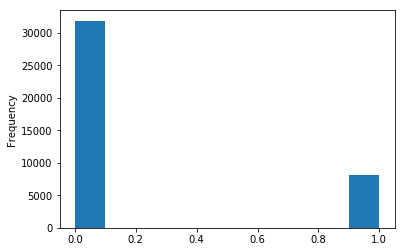

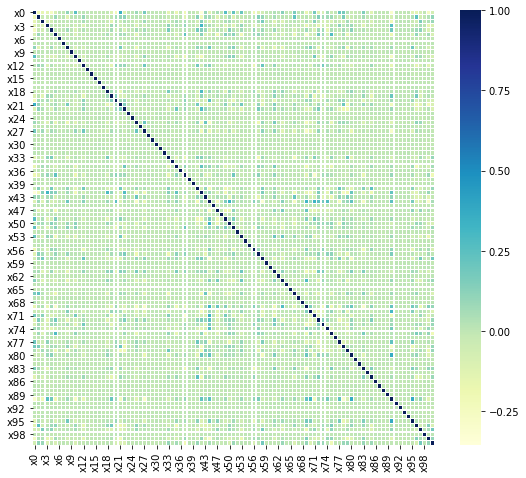

In [39]:
labels.plot(kind ="hist") 

corrmat = dataset.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## variance infelation factor
The variance inflation factor quantifies the extent of multicollinearity in our predictors. We used the VIF measure to help identify deterministic relationships between variables. Before removing highly correlated variables, some of the VIF values were in the hundreds. We see many inf values, indicating that many features are completely linearly determined by others. We will need to do variable selection or regularization to deal with this.

[8, 9, 11, 13, 15, 16, 17, 18, 19, 25, 26, 28, 30, 31, 32, 33, 34, 36, 37, 38, 40, 41, 42, 48, 50, 54, 56, 57, 61, 62, 64, 66, 67, 69, 70, 78, 83, 84, 86, 88, 89, 90, 91, 93, 94, 95, 96, 100]


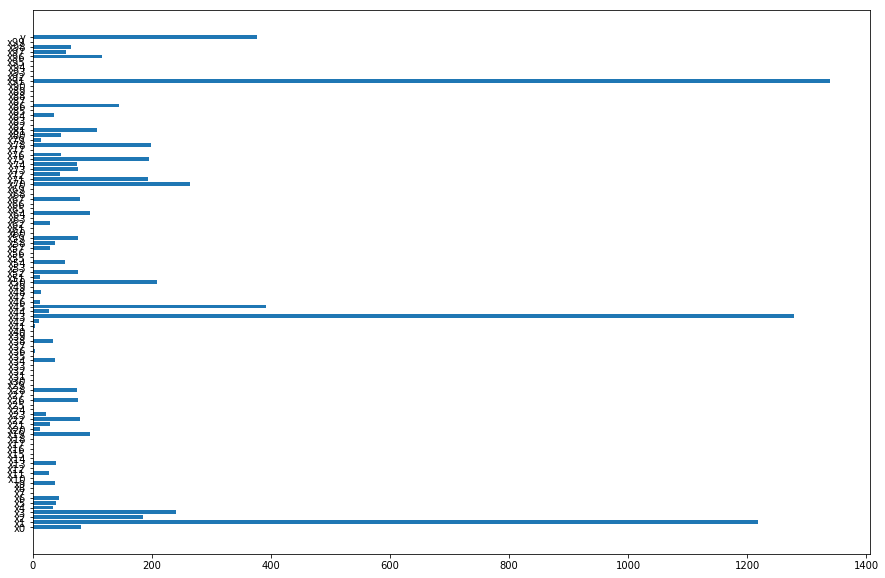

In [40]:

from statsmodels.tools.tools import add_constant



X = add_constant(data.astype(float))

vif = [variance_inflation_factor(np.array(X), i) for i in range(X. shape[1])]
plt.figure(figsize=(15, 10))

col=[]
m=1
for i in vif:
    if i<5:
        col.append(m)
    m=m+1
print(col)
x = np.arange(len(vif))
plt.barh(x, vif) 
plt.yticks(x, dataset.columns) 
plt.show()

## Dimentionality reduction using PCA

In [ ]:
print(dataset.shape,dataset.shape)

from sklearn.decomposition import PCA
from sklearn.utils import shuffle

pca = PCA(n_components=80)
pca.fit(data.astype(float))  
print(data.shape)
datapca=pca.transform(data)
print(datapca.shape)
df = pd.DataFrame(datapca)
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

In [ ]:
data_test_pca=pca.transform(dataset_test)  
df = pd.DataFrame(data_test)
corrmat = df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

## Dealing with imbalanced data and Normalize data

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
print(data.shape)
scaled=scaler.fit(data)
data_normal=scaled.transform(data)
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus = RandomUnderSampler(return_indices=True)
ros = RandomOverSampler()
X_rus, y_rus = ros.fit_sample(data_normal, labels)

(40000, 100)


Using TensorFlow backend.


In [43]:
print(dataset_test.shape)
data_normal_test=scaled.transform(dataset_test)

(10000, 100)


### Splitting the data to train and validation:

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X_rus,y_rus,test_size=0.15)

# Training with Logistic regression

We evaluate the model with accuracy recall f1score precision


C:\Users\matin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Confusion matrix:
 [[4006  781]
 [ 811 3958]]


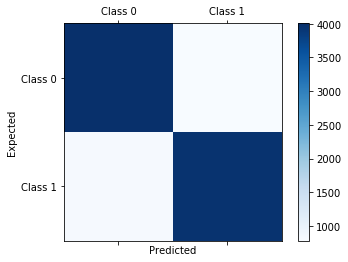

accuracy 0.8334030975303475
precision 0.8351972990082296
recall 0.8299433843573076
f1 0.8325620530079932


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
model = LogisticRegression()
model.fit(X_train, y_train)

model.score(X_train, y_train)
#print(model.feature_importances_)
y_pred= model.predict(X_val)

from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
acc=accuracy_score(y_val, y_pred)
precision=precision_score(y_val, y_pred)
recall=recall_score(y_val, y_pred)
f1=f1_score(y_val, y_pred)

print("accuracy",acc)
print("precision",precision)
print("recall",recall)
print("f1",f1)
y_pred_test3= model.predict(data_normal_test)

[0 1 1 ... 1 1 1]
Confusion matrix:
 [[4157  556]
 [  57 4786]]


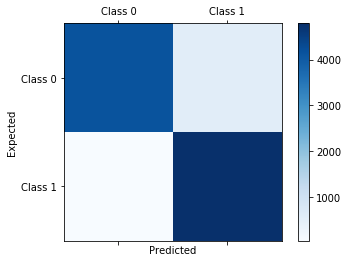

accuracy 0.9358518208455421
precision 0.8959191314114564
recall 0.9882304356803634
f1 0.9398134511536573


In [81]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred= model.predict(X_val)
print(y_pred) 
conf_mat = confusion_matrix(y_true=y_val, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()
acc=accuracy_score(y_val, y_pred)
precision=precision_score(y_val, y_pred)
recall=recall_score(y_val, y_pred)
f1=f1_score(y_val, y_pred)

print("accuracy",acc)
print("precision",precision)
print("recall",recall)
print("f1",f1)


In [82]:

y_pred_test= model.predict(data_normal_test)

## Training with Random Forest
### Area under curve for Random Forest

C:\Users\matin\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9822096845401365


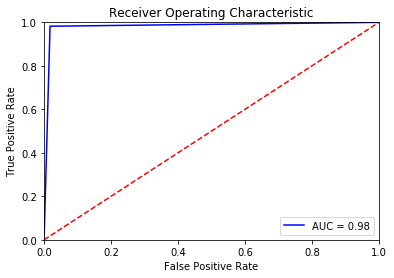

accuracy 0.9822101297614064
precision 0.9826482131790952
recall 0.9822424117282677
f1 0.9824452705493598
      label_test
0              0
1              0
2              0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             1
15             1
16             1
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             1
29             0
...          ...
9970           0
9971           0
9972           0
9973           0
9974           0
9975           0
9976           0
9977           1
9978           0
9979           0
9980           0
9981           0
9982           1
9983           1
9984           0
9985           1
9986           0
9987           0
9988           0
9989           0
9990       

In [83]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
model= RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_train, y_train)
y_pred= model.predict(X_val)
fpr, tpr, threshold = metrics.roc_curve(y_val, y_pred)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acc=accuracy_score(y_val, y_pred)
precision=precision_score(y_val, y_pred)
recall=recall_score(y_val, y_pred)
f1=f1_score(y_val, y_pred)

print("accuracy",acc)
print("precision",precision)
print("recall",recall)
print("f1",f1)
y_pred_test2= model.predict(data_normal_test)
output = pd.DataFrame({'label_test': y_pred_test2 })
print(output)
import csv
output.to_csv("final_output.csv", encoding='utf-8', index=False)

### Comparison of the results of 3 method two by two 

0.645906455606441


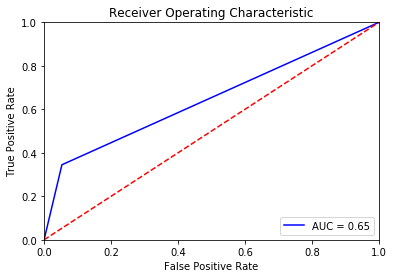

In [42]:
fpr, tpr, threshold = metrics.roc_curve(y_pred_test, y_pred_test2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acc=accuracy_score(y_pred_test, y_pred_test2)
precision=precision_score(y_pred_test, y_pred_test2)
recall=recall_score(y_pred_test, y_pred_test2)
f1=f1_score(y_pred_test, y_pred_test2)

0.645906455606441


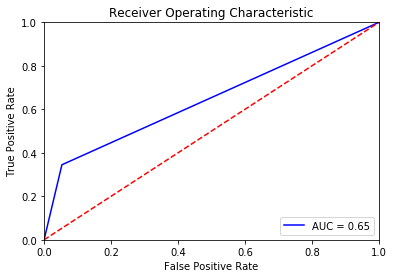

In [43]:
fpr, tpr, threshold = metrics.roc_curve(y_pred_test, y_pred_test2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acc=accuracy_score(y_pred_test, y_pred_test3)
precision=precision_score(y_pred_test, y_pred_test3)
recall=recall_score(y_pred_test, y_pred_test3)
f1=f1_score(y_pred_test, y_pred_test3)

0.645906455606441


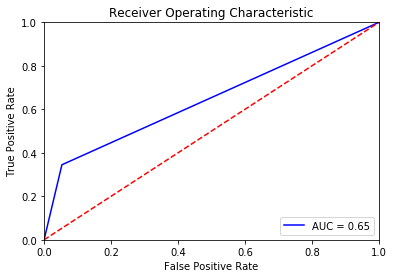

In [44]:
fpr, tpr, threshold = metrics.roc_curve(y_pred_test, y_pred_test2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acc=accuracy_score(y_pred_test2, y_pred_test3)
precision=precision_score(y_pred_test2, y_pred_test3)
recall=recall_score(y_pred_test2, y_pred_test3)
f1=f1_score(y_pred_test2, y_pred_test3)

In [45]:
print([y_pred_test,y_pred_test2,y_pred_test3])

[array([0, 0, 0, ..., 0, 1, 0], dtype=int64), array([1, 0, 0, ..., 0, 1, 0], dtype=int64), array([0, 0, 0, ..., 0, 1, 0], dtype=int64)]


## Comparing the distribution of the train and test

In [46]:
dataset.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,39988.000000,39990.000000,39993.000000,39987.000000,39993.000000,39992.000000,39991.000000,39990.000000,39994.000000,39993.000000,39993.000000,39991.000000,39989.000000,39985.000000,39995.000000,39992.000000,39992.000000,39989.000000,39986.000000,39992.000000,39996.000000,39988.000000,39994.000000,39991.000000,39989.000000,39993.000000,39990.000000,39993.000000,39991.000000,39997.000000,39998.000000,39991.000000,39997.000000,39989.000000,40000.000000,40000.000000,39994.000000,39995.000000,39994.000000,39990.000000,39992.000000,39989.000000,39999.000000,39997.000000,39991.000000,39997.000000,39992.000000,39996.000000,39995.000000,39987.000000,39993.000000,39995.000000,39994.000000,39984.000000,39989.000000,39992.000000,39991.000000,39990.000000,39988.000000,39993.000000,39987.000000,39992.000000,39995.000000,39990.000000,39990.000000,39993.000000,40000.000000,39989.000000,39994.000000,39994.000000,39991.000000,39987.000000,39991.000000,39990.000000,39992.000000,39989.000000,39992.000000,39993.000000,39993.000000,39997.000000,39992.000000,39996.000000,39997.000000,39988.000000,39993.000000,39991.000000,39995.000000,39990.000000,39993.000000,39998.000000,39994.000000,40000.000000,39991.000000,39993.000000,39986.000000,39991.000000,39996.000000,39987.000000,40000.000000
mean,2.020255,-3.924559,1.006619,-1.378330,0.070199,-0.715213,-0.002706,-0.025689,-0.354808,-0.017024,6.665975,0.034923,-5.970745,0.000768,0.000059,0.004214,-0.022206,0.001141,9.541344,-0.002005,6.004879,1.139287,-1.425996,-0.003322,0.045902,0.009791,0.003568,3.660630,-0.004986,0.026592,-0.033786,0.021634,0.018748,-1.008806,4.509550,6.038325,0.001262,0.501593,0.007089,0.010948,1.129055,-0.615998,0.132118,-18.847071,0.016371,-0.006230,0.077345,0.046994,8.071981,-6.839185,-0.001841,0.013845,-0.029329,0.054400,-2.012946,-0.004411,-4.254643,-0.035159,-0.006143,-0.009654,-0.004942,-2.519188,-0.028990,-0.017102,-1.116212,-0.079292,5.324225,-1.662139,0.528315,0.238226,-3.011393,-5.706469,0.355379,0.823520,0.006154,-0.084086,-0.996117,1.274121,-0.105175,0.004829,-0.001569,0.759918,-0.038571,-0.565348,0.043030,0.035157,0.014063,0.003357,-11.953656,0.002118,0.024486,0.957225,-0.012012,0.019123,-0.317345,-0.562453,0.000484,0.179715,0.203675
std,9.590599,18.768656,21.062970,29.397779,20.243287,18.268807,6.789876,5.600785,1.598967,1.346529,35.801754,6.860888,24.362354,1.878066,7.653960,3.141774,5.093754,4.569268,38.677783,4.983302,30.998365,6.376753,29.629219,7.393135,5.755447,1.935206,0.915606,15.624530,0.669317,5.138766,5.880190,4.343648,4.487099,5.192007,4.231803,1.452157,0.843440,3.344011,2.128168,7.986958,21.585912,29.110881,34.320001,76.808795,5.111123,12.891944,9.573325,38.163352,43.364538,39.218449,1.086372,3.804674,5.451172,5.606362,37.285183,0.884665,30.114887,7.745029,5.976125,10.735138,8.108900,13.372699,7.006466,3.713853,19.864809,9.884287,3.231503,15.149470,2.884789,36.244519,15.230049,30.562153,36.872256,5.364249,4.221527,23.323099,5.489479,25.752753,28.157818,5.359474,0.701151,16.945744,8.734670,2.879633,6.185150,7.829935,3.782974,4.644144,132.765199,1.643530,7.222472,0.337784,2.813507,8.553992,9.321339,4.050658,0.060034,4.506750,0.402735
min,-36.842503,-79.156374,-89.728356,-126.652341,-76.412886,-73.743342,-26.354840,-21.541786,-6.567005,-5.278747,-150.796197,-27.113879,-105.744748,-7.996824,-31.509585,-12.866864,-19.867273,-17.949113,-146.266220,-20.225637,-137.358930,-25.942111,-127.308041,-36.659329,-20.819297,-7.652042,-4.083499,-61.631683,-2.717812,-21.694339,-25.868453,-17.979339,-18.738550,-23.913613,0.000000,0.000000,-3.110609,-13.504928,-8.616528,-30.944255,-88.270717

In [47]:
dataset_test.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x42,x43,x44,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2.123400,-4.170383,0.429564,-1.670248,0.492787,-0.860864,0.051065,-0.016678,-0.363498,0.005506,6.640606,-0.011760,-6.473690,-0.005204,-0.017254,0.014921,-0.043534,-0.072783,9.815288,0.112017,5.880656,1.291633,-1.609175,-0.130794,-0.024016,0.025234,-0.008298,3.841278,0.001533,-0.016515,-0.099610,0.004159,-0.005255,-0.959042,4.468500,6.037800,-0.000859,0.476239,-0.023798,0.156354,1.429174,-0.613990,-0.593786,-19.979030,-0.000001,0.037901,0.011804,-0.076775,8.897746,-7.628405,0.003742,0.059649,-0.111604,0.095437,-1.579061,0.011125,-4.457416,0.056102,0.105662,0.115999,-0.196467,-2.446079,0.119896,-0.016371,-1.447562,0.068247,5.341200,-1.838995,0.550549,-0.011065,-3.103791,-5.569714,-0.064161,0.792738,0.025817,-0.171833,-0.882586,1.130581,0.067361,-0.054069,0.009445,0.841608,0.053410,-0.588325,-0.048604,-0.030047,-0.032207,0.100973,-12.190026,-0.000351,0.002686,0.959700,-0.041804,-0.113439,-0.401268,-0.551988,-0.000314,0.174459
std,9.688948,18.694474,21.028251,29.335529,20.075050,18.376705,6.783423,5.646038,1.631114,1.355553,36.209106,6.827385,24.135378,1.871279,7.589147,3.136020,5.174407,4.611029,38.698105,4.993158,30.970314,6.294644,29.870055,7.327095,5.793632,1.946284,0.910681,15.550201,0.661901,5.159883,5.820027,4.374328,4.464810,5.145921,4.210983,1.457321,0.849339,3.349910,2.132535,7.950188,21.619658,29.212737,34.096011,77.367652,5.091681,13.138976,9.498531,38.259142,43.789430,39.007769,1.066585,3.772781,5.495347,5.565199,37.085798,0.893806,30.015197,7.737770,6.080306,10.601577,8.063597,13.429326,6.986671,3.697091,19.933743,9.914559,3.224658,14.979034,2.888869,36.741238,15.290888,31.064060,36.976956,5.330727,4.257788,22.928056,5.485680,25.790167,28.466857,5.341640,0.696850,16.726781,8.714170,2.930714,6.220960,7.712854,3.719351,4.628811,132.217423,1.633678,7.249654,0.329677,2.799772,8.594244,9.311640,4.085853,0.059219,4.512323
min,-35.502970,-79.642519,-78.549288,-122.923518,-75.801406,-70.261284,-25.321554,-20.933111,-6.074191,-5.283435,-122.162093,-27.451741,-104.393524,-6.465028,-29.129017,-11.796019,-22.272864,-16.808531,-140.860470,-15.880984,-109.696868,-23.874339,-126.563489,-26.514960,-22.645742,-7.533795,-4.180827,-56.409852,-2.459085,-18.604811,-20.991881,-16.571994,-18.751318,-21.109099,0.000000,0.000000,-3.424519,-12.589943,-7.476906,-29.985699,-76.823971,-118.790197,-148.603188,-

## comparison of the result for voting

In [ ]:
output = pd.DataFrame({'Column1': y_pred_test, 'Column2': y_pred_test2,'Column3': y_pred_test3})
print(output)
import csv
output.to_csv("out.csv", encoding='utf-8', index=False)

In [49]:
output_maj = output.mode(axis=1)[0]

0.8018993602812264


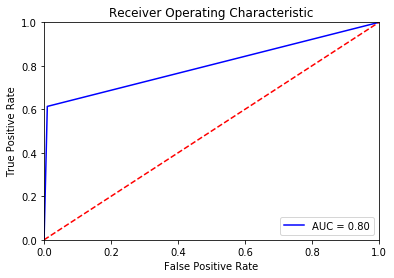

In [50]:
fpr, tpr, threshold = metrics.roc_curve(output_maj, y_pred_test2)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)
# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

acc=accuracy_score(output_maj, y_pred_test2)
precision=precision_score(output_maj, y_pred_test2)
recall=recall_score(output_maj, y_pred_test2)
f1=f1_score(output_maj, y_pred_test2)

## neural network

In [51]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import optimizers,utils

#optimizer_func = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
optimizer_func = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#optimizer_func = optimizers.SGD(lr=0.001, clipnorm=1.)
#optimizer_func = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
#optimizer_func = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)

model = Sequential()
model.add(Dense(20, input_dim=100, init='uniform', activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
# Compile model
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras import backend as K
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc
def recall_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

def precision_m(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

model.compile(loss='binary_crossentropy', optimizer=optimizer_func, metrics=['accuracy',auc,recall_m,precision_m,f1_m])
# Fit the model
model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=20, batch_size=10,  verbose=2)
# calculate predictions
predictions = model.predict(X_val)
y_pred = (predictions > 0.5)

acc=accuracy_score(y_val, y_pred)
precision=precision_score(y_val, y_pred)
recall=recall_score(y_val, y_pred)
f1=f1_score(y_val, y_pred)

print("accuracy",acc)
print("precision",precision)
print("recall",recall)
print("f1",f1)


C:\Users\matin\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(20, input_dim=100, activation="relu", kernel_initializer="uniform")`
  if sys.path[0] == '':


Train on 54150 samples, validate on 9556 samples
Epoch 1/20
 - 78s - loss: 0.4447 - acc: 0.7922 - auc: 0.7942 - recall_m: 0.7493 - precision_m: 0.8220 - f1_m: 0.7635 - val_loss: 0.2156 - val_acc: 0.9307 - val_auc: 0.8905 - val_recall_m: 0.9090 - val_precision_m: 0.9424 - val_f1_m: 0.9167
Epoch 2/20
 - 74s - loss: 0.3147 - acc: 0.8768 - auc: 0.9129 - recall_m: 0.8262 - precision_m: 0.9187 - f1_m: 0.8557 - val_loss: 0.1624 - val_acc: 0.9515 - val_auc: 0.9259 - val_recall_m: 0.9315 - val_precision_m: 0.9634 - val_f1_m: 0.9407
Epoch 3/20
 - 74s - loss: 0.2844 - acc: 0.8879 - auc: 0.9335 - recall_m: 0.8349 - precision_m: 0.9297 - f1_m: 0.8673 - val_loss: 0.1527 - val_acc: 0.9519 - val_auc: 0.9387 - val_recall_m: 0.9305 - val_precision_m: 0.9655 - val_f1_m: 0.9416
Epoch 4/20
 - 74s - loss: 0.2774 - acc: 0.8916 - auc: 0.9423 - recall_m: 0.8371 - precision_m: 0.9356 - f1_m: 0.8710 - val_loss: 0.1416 - val_acc: 0.9580 - val_auc: 0.9453 - val_recall_m: 0.9406 - val_precision_m: 0.9673 - val_f1_m

In [59]:

predictions = model.predict(data_normal_test)
y_pred = (predictions > 0.5)

acc=accuracy_score(y_pred_test2, y_pred)
precision=precision_score(y_pred_test2, y_pred)
recall=recall_score(y_pred_test2, y_pred)
f1=f1_score(y_pred_test2, y_pred)

In [60]:
print("accuracy",acc)
print("precision",precision)
print("recall",recall)
print("f1",f1)

accuracy 0.8871
precision 0.50390625
recall 0.9013100436681223
f1 0.646414030692139


## based on the previous result we decided to report the random forest data
the validation data is about 98% with random forrest and we decided to use the output of the random forest. 
also we checked the voting between the different model but still random forest has the better output.